# Data Uploading & python Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from datetime import datetime as dt

In [ ]:
# Python libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
# import libraries
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
from scipy import stats
import os
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection
from sklearn.metrics import ( log_loss, classification_report)



In [267]:
data = pd.read_csv('HR_Recruitment.csv')
data.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,25.5.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 95,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,yes,Single
1,25.5.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 96,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,no,Married
2,25.5.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 97,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Married
3,25.5.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 98,Female,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,yes,Married
4,25-05-2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 99,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,yes,Married


# EDA & Statistical Analysis

In [268]:
data.shape

(714, 23)

In [269]:
display(data.isnull().any())

Date of Interview                                                                                     False
Client name                                                                                           False
Industry                                                                                              False
Location                                                                                              False
Position to be closed                                                                                 False
Nature of Skillset                                                                                    False
Interview Type                                                                                        False
Name(Cand ID)                                                                                         False
Gender                                                                                                False
Candidate Current Location  

## Renaming Columns for convenience

**Assigning the Questions for reducing complexity to understand**
- <a href='#Q.1'>Q1=Have you obtained the necessary permission to start at the required time?</a> 
- <a href='#Q.2'>Q2=Hope there will be no unscheduled meetings?</a> 
- <a href='#Q.3'>Q3=Can I Call you three hours before the interview and follow up on your attendance for the interview?</a> 
- <a href='#Q.4'>Q4=Can I have an alternative number/ desk number. I assure you that I will not trouble you too much?</a> 
- <a href='#Q.5'>Q5=Have you taken a printout of your updated resume. Have you read the JD and understood the same?</a> 
- <a href='#Q.6'>Q6=Are you clear with the venue details and the landmark?</a> 
- <a href='#Q.7'>Q7=Has the call letter been shared?</a> 



In [270]:
data.rename(columns={'Client name':'Client_name','Date of Interview':'Date_of_Interview','Position to be closed':'Position_Status','Nature of Skillset':'Technical_Skillset','Interview Type':'Interview_Type','Name(Cand ID)':'ID','Candidate Current Location':'Candidate_Current_Location','Candidate Job Location':'Candidate_Job_Location','Interview Venue':'Interview_Venue','Candidate Native location':'Candidate_Native_location',
                      'Expected Attendance':'Expected_Attendance' ,'Observed Attendance':'Observed_Attendance','Marital Status':'Marital_Status'},inplace=True)

In [271]:
data.rename(columns={'Have you obtained the necessary permission to start at the required time':'Q1'
,'Hope there will be no unscheduled meetings':'Q2',
'Can I Call you three hours before the interview and follow up on your attendance for the interview':'Q3',
'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much':'Q4'
,'Have you taken a printout of your updated resume. Have you read the JD and understood the same':'Q5',
'Are you clear with the venue details and the landmark.':'Q6',
'Has the call letter been shared':'Q7'} ,inplace=True)

In [272]:
data.columns

Index(['Date_of_Interview', 'Client_name', 'Industry', 'Location',
       'Position_Status', 'Technical_Skillset', 'Interview_Type', 'ID',
       'Gender', 'Candidate_Current_Location', 'Candidate_Job_Location',
       'Interview_Venue', 'Candidate_Native_location', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Expected_Attendance', 'Observed_Attendance',
       'Marital_Status'],
      dtype='object')

## Conversion of Date Time Column

In [273]:
data['Date_of_Interview'] = pd.to_datetime(data['Date_of_Interview'], errors='coerce')
data['Year'] = data['Date_of_Interview'].dt.year
data['Month'] = data['Date_of_Interview'].dt.month
data['Day'] = data['Date_of_Interview'].dt.day
data['Date_of_Interview']=pd.to_datetime((data.Year*10000+data.Month*100+data.Day).apply(str),format='%Y%m%d')

## Missing Values

In [274]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing_Ratio' :all_data_na})
missing_data.head(20)

,Missing_Ratio
Q7,34.313725
Q6,32.492997
Q4,31.792717
Q1,27.450980
Q5,26.330532
Q2,26.330532
Q3,26.190476
Day,2.801120
Month,2.801120
Year,2.801120


In [275]:
trace = go.Bar(x =missing_data.Missing_Ratio , y = missing_data.index, orientation = 'h', opacity = 0.8, marker=dict(
        
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [276]:
data.dtypes

Date_of_Interview             datetime64[ns]
Client_name                           object
Industry                              object
Location                              object
Position_Status                       object
Technical_Skillset                    object
Interview_Type                        object
ID                                    object
Gender                                object
Candidate_Current_Location            object
Candidate_Job_Location                object
Interview_Venue                       object
Candidate_Native_location             object
Q1                                    object
Q2                                    object
Q3                                    object
Q4                                    object
Q5                                    object
Q6                                    object
Q7                                    object
Expected_Attendance                   object
Observed_Attendance                   object
Marital_St

In [277]:
data.columns

Index(['Date_of_Interview', 'Client_name', 'Industry', 'Location',
       'Position_Status', 'Technical_Skillset', 'Interview_Type', 'ID',
       'Gender', 'Candidate_Current_Location', 'Candidate_Job_Location',
       'Interview_Venue', 'Candidate_Native_location', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Expected_Attendance', 'Observed_Attendance',
       'Marital_Status', 'Year', 'Month', 'Day'],
      dtype='object')

In [278]:
Missing_Atrributes=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Expected_Attendance','Date_of_Interview','Day','Month','Year']
for col in Missing_Atrributes:
    data[col] = data[col].fillna('NA')

In [279]:
data.Expected_Attendance.unique()

array(['Yes', 'No', 'Uncertain', 'NO', 'NA', '11:00 AM', '10.30 Am'],
      dtype=object)

In [280]:
Bad_Fillings=['11:00 AM','10.30 Am']
for i in Bad_Fillings :
    data.loc[data['Expected_Attendance'] == i, 'Expected_Attendance'] = 'NA'

In [281]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing_Ratio' :all_data_na})
missing_data.head(20)

,Missing_Ratio


## Cleaning categorical Columns to Unique

In [282]:
cols=[ 'Client_name', 'Industry',
       'Position_Status', 'Technical_Skillset', 'Interview_Type',
       'Gender','Interview_Venue', 'Candidate_Native_location', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Expected_Attendance', 'Observed_Attendance',
       'Marital_Status']
for i in cols:
    print("Uniques values in",i,':')
    print(data[i].unique())
    

Uniques values in Client_name :
['Standard Chartered Bank' 'ANZ' 'Hospira' 'Pfizer' 'Aon hewitt Gurgaon'
 'Aon Hewitt' 'Astrazeneca']
Uniques values in Industry :
['BFSI' 'Pharmaceuticals' 'IT Products and Services']
Uniques values in Position_Status :
['Routine' 'Niche']
Uniques values in Technical_Skillset :
['Accounting Operations' 'Banking Operations' 'AML/KYC/CDD' 'CDD KYC'
 'Biosimiliars' 'RA Label' 'RA Publishing' 'EMEA' 'LCM -Manager'
 'Licensing – RA' 'generic drugs – RA' 'Biosimilars' 'production'
 'Java J2EE' 'Java,SQL' 'Automation Testing Java' 'Submission Management'
 'Biosimillar' 'Publishing' 'Global Labelling' 'ALS Testing'
 'Lending and Liabilities' 'Lending & Liability' 'Lending And Liabilities'
 'L & L' 'Banking operations' 'Lending&Liablities'
 'JAVA/J2EE/Struts/Hibernate' 'JAVA/SPRING/HIBERNATE/JSF' 'Java,J2ee, JSF'
 'Java ,J2ee' 'Java J2ee' '11.30 AM' '10.00 AM' '9.00 Am' '12.30 Pm'
 '9.30 AM' '11.30 Am' 'Java, J2Ee' 'Java,J2EE' 'Java Developer'
 'Java/J2ee' 'JAVA

**Changing the Question Columns categorical Values to one common unique labels**

In [283]:
Yes=['yes','yes ']
NA=['NA','na']
No=['no','N0','NO','No ']

data['Q1'] = data['Q1'].apply(lambda x: 'Yes' if x in Yes else x)
data['Q1'] = data['Q1'].apply(lambda x: 'Na'  if x in NA else x)

data['Q2'] = data['Q2'].apply(lambda x: 'Yes' if x in Yes else x)
data['Q2'] = data['Q2'].apply(lambda x: 'Na' if x in NA else x)

data['Q3'] = data['Q3'].apply(lambda x: 'Na' if x in NA else x)
data['Q3'] = data['Q3'].apply(lambda x: 'Yes' if x in Yes else x)

data['Q4'] = data['Q4'].apply(lambda x: 'Na' if x in NA else x)

data['Q5'] = data['Q5'].apply(lambda x: 'Na' if x in NA else x)
data['Q5'] = data['Q5'].apply(lambda x: 'Yes' if x in Yes else x)

data['Q6'] = data['Q6'].apply(lambda x: 'Yes' if x in Yes else x)
data['Q6'] = data['Q6'].apply(lambda x: 'Na' if x in NA else x)
data['Q6'] = data['Q6'].apply(lambda x: 'No' if x in No else x)

data['Q7'] = data['Q7'].apply(lambda x: 'Yes' if x in Yes else x)
data['Q7'] = data['Q7'].apply(lambda x: 'Na' if x in NA else x)
data['Q7'] = data['Q7'].apply(lambda x: 'No' if x in No else x)

print(data.Q7.unique())

['Yes' 'Yet to Check' 'Not Sure' 'Na' 'Not yet' 'No']


In [284]:
cols=[ 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7']
for i in cols:
    print("Uniques values in",i,':')
    print(data[i].unique())
    

Uniques values in Q1 :
['Yes' 'Na' 'No' 'Not yet']
Uniques values in Q2 :
['Yes' 'No' 'Na']
Uniques values in Q3 :
['Yes' 'No' 'Na']
Uniques values in Q4 :
['Yes' 'Na' 'No']
Uniques values in Q5 :
['Yes' 'No' 'Na' 'Not yet']
Uniques values in Q6 :
['Yes' 'Na' 'No']
Uniques values in Q7 :
['Yes' 'Yet to Check' 'Not Sure' 'Na' 'Not yet' 'No']


**Value counts of the category of technical skillset**

In [285]:
data.Technical_Skillset.value_counts()

JAVA/J2EE/Struts/Hibernate                220
AML/KYC/CDD                                84
Accounting Operations                      78
CDD KYC                                    52
SAS                                        27
Lending and Liabilities                    22
Banking Operations                         18
Java J2ee                                  16
ALS Testing                                15
SCCM                                       14
Hadoop                                     12
Publishing                                  9
RA Publishing                               9
JAVA/SPRING/HIBERNATE/JSF                   8
Automation Testing Java                     7
Java                                        7
Biosimiliars                                6
Java/J2ee                                   6
EMEA                                        6
Java,J2ee, JSF                              6
Global Labelling                            6
JAVA,SQL                          

## Reframing the unique Technical Skills

In [286]:
Java_hibernate=['JAVA/J2EE/Struts/Hibernate' ,'JAVA/SPRING/HIBERNATE/JSF' ,'Java,J2ee, JSF','Java, Spring, Hibernate' ,'Java, XML, Struts, hibernate']
Java_SQL=['JAVA,SQL' ,'Java,SQL', 'Java, SQL','Jsva']
JAVA= [ 'Java J2EE' ,'Java ,J2ee' ,'Java J2ee', 'Java, J2Ee' ,'Java,J2EE','Java Developer','Java ' ,'Java', 'Java/J2ee', 'JAVA/J2EE']
SSCM=['SCCM','SCCM-(Network, sharepoint,ms exchange)', 'SCCm- Desktop support','Sccm- networking' ,'sccm', 'SCCM – SQL' ,'SCCM – Sharepoint', 'Production Support - SCCM']
SAS=['BaseSAS Program/ Reporting']
Lending_Liablilities =['Lending and Liabilities' ,'Lending & Liability' ,'Lending And Liabilities','L & L' , 'Lending&Liablities']
Marker=['11.30 AM', '10.00 AM' ,'9.00 Am' ,'12.30 Pm','9.30 AM' ,'11.30 Am']
Clientname=['Aon hewitt Gurgaon','Aon Hewitt']
CYC=['CDD KYC']


In [287]:
data['Technical_Skillset'] = data['Technical_Skillset'].apply(lambda x: 'Java_SQL' if x in Java_SQL else x)
data['Technical_Skillset'] = data['Technical_Skillset'].apply(lambda x: 'Java_Hibernate' if x in Java_hibernate else x)
data['Technical_Skillset'] = data['Technical_Skillset'].apply(lambda x: 'SAS' if x in SAS else x)
data['Technical_Skillset'] = data['Technical_Skillset'].apply(lambda x: 'SSCM' if x in SSCM else x)
data['Technical_Skillset'] = data['Technical_Skillset'].apply(lambda x: 'Java' if x in JAVA else x)
data['Technical_Skillset'] = data['Technical_Skillset'].apply(lambda x: 'Lending_&_Liablities' if x in Lending_Liablilities else x)
data['Technical_Skillset'] = data['Technical_Skillset'].apply(lambda x: 'NA' if x in Marker else x)
data['Technical_Skillset'] = data['Technical_Skillset'].apply(lambda x:  'AML/KYC/CDD'if x in CYC else x)
data['Client_name'] = data['Client_name'].apply(lambda x: 'Aon Hewitt' if x in Clientname else x)

In [288]:
print(data.Technical_Skillset.value_counts())

Java_Hibernate             239
AML/KYC/CDD                136
Accounting Operations       78
Java                        48
Lending_&_Liablities        33
SAS                         28
SSCM                        25
Banking Operations          18
ALS Testing                 15
Hadoop                      12
Java_SQL                    11
Publishing                   9
RA Publishing                9
NA                           7
Automation Testing Java      7
Biosimiliars                 6
EMEA                         6
Global Labelling             6
generic drugs – RA           4
Licensing – RA               4
Biosimillar                  3
RA Label                     2
LCM -Manager                 2
Submission Management        2
Banking operations           2
Biosimilars                  1
production                   1
Name: Technical_Skillset, dtype: int64


In [289]:
print(data.Client_name.value_counts())

Standard Chartered Bank    601
Pfizer                      37
Aon Hewitt                  25
Hospira                     18
ANZ                         18
Astrazeneca                 15
Name: Client_name, dtype: int64


In [290]:
data['ID']=data['ID'].str.split(' ').str[1].astype(int)

In [291]:
data.Interview_Type.unique()

array(['Scheduled Walkin', 'Scheduled ', 'Scheduled Walk In', 'Walkin',
       'Walkin '], dtype=object)

In [292]:
Marker_Interview=['Scheduled Walk In','Scheduled Walkin']
data['Interview_Type'] = data['Interview_Type'].apply(lambda x: 'Scheduled_Walkin' if x in Marker_Interview  else x)
data['Interview_Type'] = data['Interview_Type'].str.strip()
data.Interview_Type.unique()

array(['Scheduled_Walkin', 'Scheduled', 'Walkin'], dtype=object)

In [293]:
data['Interview_Type'].value_counts()

Scheduled_Walkin    489
Scheduled           170
Walkin               55
Name: Interview_Type, dtype: int64

In [294]:
data['Observed_Attendance'].unique()

array(['yes', 'no', 'No', 'Yes', 'yes ', 'No ', 'NO'], dtype=object)

In [295]:
Marker=['yes', 'Yes', 'yes ']
data['Observed_Attendance'] = data['Observed_Attendance'].apply(lambda x: 'Yes' if x in Marker else 'No')
data['Observed_Attendance'].unique()

array(['Yes', 'No'], dtype=object)

In [296]:
data['Expected_Attendance'].unique()

array(['Yes', 'No', 'Uncertain', 'NO', 'NA'], dtype=object)

In [297]:
Marker=['NO']
# Apply title case to every entity NOT in myString
data['Expected_Attendance'] = data['Expected_Attendance'].apply(lambda x: 'No' if x in Marker else x )
data['Expected_Attendance'].unique()

array(['Yes', 'No', 'Uncertain', 'NA'], dtype=object)

In [298]:
Marker=['yes', 'Yes', 'yes ']
data['Observed_Attendance_Numeric'] = data['Observed_Attendance'].apply(lambda x: 1 if x in Marker else 0)
data['Observed_Attendance_Numeric'].unique()

array([1, 0], dtype=int64)

In [299]:
#datasets
Present= data[(data['Observed_Attendance_Numeric'] == 1)]
print(len(Present))
Absent = data[(data['Observed_Attendance_Numeric'] == 0)]
print(len(Absent))

468
246


In [300]:
data.Observed_Attendance_Numeric.unique()

array([1, 0], dtype=int64)

In [301]:
data.dtypes

Date_of_Interview              object
Client_name                    object
Industry                       object
Location                       object
Position_Status                object
Technical_Skillset             object
Interview_Type                 object
ID                              int32
Gender                         object
Candidate_Current_Location     object
Candidate_Job_Location         object
Interview_Venue                object
Candidate_Native_location      object
Q1                             object
Q2                             object
Q3                             object
Q4                             object
Q5                             object
Q6                             object
Q7                             object
Expected_Attendance            object
Observed_Attendance            object
Marital_Status                 object
Year                           object
Month                          object
Day                            object
Observed_Att

In [302]:
data.Observed_Attendance.describe()

count     714
unique      2
top       Yes
freq      468
Name: Observed_Attendance, dtype: object

In [303]:
cols=[ 'Client_name', 'Industry',
       'Position_Status', 'Technical_Skillset', 'Interview_Type',
       'Gender','Interview_Venue', 'Candidate_Native_location', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Expected_Attendance', 'Observed_Attendance',
       'Marital_Status']
for i in cols:
    print("Uniques values in",i,':')
    print(data[i].unique())
    

Uniques values in Client_name :
['Standard Chartered Bank' 'ANZ' 'Hospira' 'Pfizer' 'Aon Hewitt'
 'Astrazeneca']
Uniques values in Industry :
['BFSI' 'Pharmaceuticals' 'IT Products and Services']
Uniques values in Position_Status :
['Routine' 'Niche']
Uniques values in Technical_Skillset :
['Accounting Operations' 'Banking Operations' 'AML/KYC/CDD' 'Biosimiliars'
 'RA Label' 'RA Publishing' 'EMEA' 'LCM -Manager' 'Licensing – RA'
 'generic drugs – RA' 'Biosimilars' 'production' 'Java' 'Java_SQL'
 'Automation Testing Java' 'Submission Management' 'Biosimillar'
 'Publishing' 'Global Labelling' 'ALS Testing' 'Lending_&_Liablities'
 'Banking operations' 'Java_Hibernate' 'NA' 'Hadoop' 'SSCM' 'SAS']
Uniques values in Interview_Type :
['Scheduled_Walkin' 'Scheduled' 'Walkin']
Uniques values in Gender :
['Male' 'Female']
Uniques values in Interview_Venue :
['Chennai' 'Bangalore' 'Hyderabad' 'Gurgaon' 'Noida']
Uniques values in Candidate_Native_location :
['Chennai' 'Hyderabad' 'Cochin' 'Trivand

# Visualization

## Distribution of observed attendence

In [304]:
#------------COUNT-----------------------
trace = go.Bar(x = (len(Present), len(Absent)), y = ['Present', 'Absent'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'green', 'darkviolet'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Present','Absent'], values = data['Observed_Attendance_Numeric'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['darkviolet', 'gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

Therefore we have to keep in mind that there is quite a big imbalance in our target variable. Many statistical techniques have been put forth to treat imbalances in data (oversampling or undersampling).  I will use an oversampling technique known as SMOTE to treat this imbalance.

In [305]:
print("Normalised gender distribution of employees in the dataset for Present: Male = {:.1f}%; Female {:.1f}%.".format((data[(data['Observed_Attendance_Numeric'] == 1) & (
    data['Gender'] == 'Male')].shape[0] / data[data['Gender'] == 'Male'].shape[0])*100, (data[(data['Observed_Attendance_Numeric'] == 1) & (data['Gender'] == 'Female')].shape[0] / data[data['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of employees in the dataset for Present: Male = 65.2%; Female 66.9%.


In [306]:
print("Normalised gender distribution of employees in the dataset for Absent: Male = {:.1f}%; Female {:.1f}%.".format((data[(data['Observed_Attendance_Numeric'] == 0) & (
    data['Gender'] == 'Male')].shape[0] / data[data['Gender'] == 'Male'].shape[0])*100, (data[(data['Observed_Attendance_Numeric'] == 0) & (data['Gender'] == 'Female')].shape[0] / data[data['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of employees in the dataset for Absent: Male = 34.8%; Female 33.1%.


## GroupBy Technical Skill

In [307]:
data.Observed_Attendance.unique()

array(['Yes', 'No'], dtype=object)

In [308]:
def reframe(INDEX,COL):
    df=data[[INDEX,'Observed_Attendance']]
    dff=df.pivot_table(index=[INDEX], columns='Observed_Attendance', aggfunc='size', fill_value=0)
    dff[COL]=dff.index
    dff.columns = [''] * len(dff.columns)
    dff = dff.reset_index(drop=True)
    dff.columns=['Absent','Present',COL]
    return dff

In [309]:
Tech_Group=  reframe('Technical_Skillset','Domain')
Tech_Group.head()

,Absent,Present,Domain
0,5,10,ALS Testing
1,59,77,AML/KYC/CDD
2,29,49,Accounting Operations
3,3,4,Automation Testing Java
4,2,16,Banking Operations


In [310]:
Absentlist = Tech_Group['Absent'].tolist()
Domain=Tech_Group['Domain'].tolist()
Presentlist=Tech_Group['Present'].tolist

In [311]:
import plotly.graph_objects as go
def barplot(Domain,Tech_Group):
    x = Domain
    fig = go.Figure()
    fig.add_trace(go.Bar(
    x=x,
    y = Tech_Group['Absent'],
    name='Absent',
    marker_color='green'
    ))
    fig.add_trace(go.Bar(
        x=x,
         y=Tech_Group['Present'],
       name='Present',
        marker_color='red'
            ))

        # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45)
    fig.show()
    return

In [312]:
barplot(Domain,Tech_Group)

## Group By Client

In [313]:
Client_Group=  reframe('Client_name','Client_Category')
Client_Group.head()

,Absent,Present,Client_Category
0,2,16,ANZ
1,2,23,Aon Hewitt
2,5,10,Astrazeneca
3,7,11,Hospira
4,8,29,Pfizer


In [314]:
Absentlist = Client_Group['Absent'].tolist()
Client_Category=Client_Group['Client_Category'].tolist()
Presentlist=Client_Group['Present'].tolist

In [315]:
barplot(Client_Category,Client_Group)

## Group By Industry

In [316]:
Industry_Group=  reframe('Industry','Industry_Category')
Industry_Group.head()

,Absent,Present,Industry_Category
0,224,395,BFSI
1,2,23,IT Products and Services
2,20,50,Pharmaceuticals


In [317]:
Absentlist = Industry_Group['Absent'].tolist()
Industry_Category=Industry_Group['Industry_Category'].tolist()
Presentlist=Industry_Group['Present'].tolist

In [318]:
barplot(Industry_Category,Industry_Group)

## Group By Interview location

In [319]:
Interview_Venue_Group=  reframe('Interview_Venue','Interview_Venue_Category')
Interview_Venue_Group.head()

,Absent,Present,Interview_Venue_Category
0,52,100,Bangalore
1,185,334,Chennai
2,1,9,Gurgaon
3,7,11,Hyderabad
4,1,14,Noida


In [320]:
Absentlist = Interview_Venue_Group['Absent'].tolist()
Interview_Venue_Category=Interview_Venue_Group['Interview_Venue_Category'].tolist()
Presentlist=Interview_Venue_Group['Present'].tolist

In [321]:
barplot(Interview_Venue_Category,Interview_Venue_Group)

## Group By Gender

In [322]:
Gender_Group=  reframe('Gender','Gender_Category')
Gender_Group.head()

,Absent,Present,Gender_Category
0,47,95,Female
1,199,373,Male


In [323]:
Absentlist = Gender_Group['Absent'].tolist()
Gender_Category=Gender_Group['Gender_Category'].tolist()
Presentlist=Gender_Group['Present'].tolist

In [324]:
barplot(Gender_Category,Gender_Group)

## Group by Marital Status

In [325]:
Marital_Status_Group=  reframe('Marital_Status','Marital_Status_Category')
Marital_Status_Group.head()

,Absent,Present,Marital_Status_Category
0,89,172,Married
1,157,296,Single


In [326]:
Absentlist = Marital_Status_Group['Absent'].tolist()
Marital_Status_Category=Marital_Status_Group['Marital_Status_Category'].tolist()
Presentlist=Marital_Status_Group['Present'].tolist

In [327]:
barplot(Marital_Status_Category,Marital_Status_Group)

## Month wise Analysis

In [329]:
data.Month.unique()

array([5.0, 4.0, 2.0, 7.0, 12.0, 10.0, 'NA', 6.0, 3.0, 1.0, 9.0, 8.0],
      dtype=object)

In [332]:
Date_of_Interview_Group=  reframe('Date_of_Interview','Date_of_Interview_Category')
Date_of_Interview_Group.head()

,Absent,Present,Date_of_Interview_Category
0,9,19,2016-01-14 00:00:00
1,12,22,2016-01-22 00:00:00
2,5,13,2016-01-30 00:00:00
3,16,27,2016-02-09 00:00:00
4,11,11,2016-02-23 00:00:00


In [337]:
import plotly.graph_objects as go
fig.add_trace(go.Scatter(x=Date_of_Interview_Group['Date_of_Interview_Category'], y=Date_of_Interview_Group['Absent'], name="Absent",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=Date_of_Interview_Group['Date_of_Interview_Category'], y=Date_of_Interview_Group['Present'], name="Present",
                         line_color='dimgray'))

fig.update_layout(title_text='Month wise category',
                  xaxis_rangeslider_visible=True)
fig.show()

In [341]:
Interview_Venue_Group.Interview_Venue_Category.unique()

array(['Bangalore', 'Chennai', 'Gurgaon', 'Hyderabad', 'Noida'],
      dtype=object)

In [350]:
Present.columns

Index(['Date_of_Interview', 'Client_name', 'Industry', 'Location',
       'Position_Status', 'Technical_Skillset', 'Interview_Type', 'ID',
       'Gender', 'Candidate_Current_Location', 'Candidate_Job_Location',
       'Interview_Venue', 'Candidate_Native_location', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Expected_Attendance', 'Observed_Attendance',
       'Marital_Status', 'Year', 'Month', 'Day',
       'Observed_Attendance_Numeric'],
      dtype='object')

**EDA Conclusion**
Normalised gender distribution of employees in the dataset for Present: Male = 65.2%; Female 66.9%.
Normalised gender distribution of employees in the dataset for Absent: Male = 34.8%; Female 33.1%.
People who are absent from Technical Domain Java, AML/CCD/KYC, Accounting Operations are more here.
And from the client Standard chartered Bank people is more absent.
By Industry-wise BFSI people showing more percentage in absent.
People who are turning out more absent from geographic location Chennai leading the most then comes Bangalore.
By Gender category Male remains absent most & Single people mostly.
By Monthly Category June is the most number of candidates got absent.



# Data Creation for Model Building

In [66]:
# Drop the Attrition_numerical column from attrition dataset first - Don't want to include that
data = data.drop(['Observed_Attendance_Numeric'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = data.columns.difference(categorical)

In [67]:
print(numerical)
print(categorical)

Index(['ID'], dtype='object')
['Date_of_Interview', 'Client_name', 'Industry', 'Location', 'Position_Status', 'Technical_Skillset', 'Interview_Type', 'Gender', 'Candidate_Current_Location', 'Candidate_Job_Location', 'Interview_Venue', 'Candidate_Native_location', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Expected_Attendance', 'Observed_Attendance', 'Marital_Status', 'Year', 'Month', 'Day']


In [68]:
# Store the categorical data in a dataframe called attrition_cat
data_cat = data[categorical]
data_cat = data_cat.drop(['Observed_Attendance','Date_of_Interview','Year', 'Month', 'Day'], axis=1) # Dropping the target column

In [69]:
data_cat = pd.get_dummies(data_cat)
print(data_cat.shape)
data_cat.head(3)

(714, 138)


,Client_name_ANZ,Client_name_Aon Hewitt,Client_name_Astrazeneca,Client_name_Hospira,Client_name_Pfizer,Client_name_Standard Chartered Bank,Industry_BFSI,Industry_IT Products and Services,Industry_Pharmaceuticals,Location_Bangalore,...,Q7_Not Sure,Q7_Not yet,Q7_Yes,Q7_Yet to Check,Expected_Attendance_NA,Expected_Attendance_No,Expected_Attendance_Uncertain,Expected_Attendance_Yes,Marital_Status_Married,Marital_Status_Single
0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [70]:
# Store the numerical features to a dataframe attrition_num
data_num = data[numerical]
# Concat the two dataframes together columnwise
#data_final = pd.concat([data_num, data_cat], axis=1)

In [71]:
# Define a dictionary for the target mapping
Marker=['yes', 'Yes', 'yes']
# Use the pandas apply method to numerically encode our attrition target variable

target = data['Observed_Attendance'].apply(lambda x: 1 if x in Marker else 0)
target.head(3)


0    1
1    0
2    0
Name: Observed_Attendance, dtype: int64

# Feature Selection

 **Note:  I have splitted the Dataset in .99 because to check the outcomes. So more training Data will reduce variance will increase F1 score and accuracy.**

## Train/Test Split

In [144]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(data_cat, 
                                                         target, 
                                                         train_size= 0.99,
                                                         random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);

## Univariate feature selection

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=6).fit(train,target_train)

In [74]:
dfscores = pd.DataFrame(select_feature.scores_)
dfcolumns = pd.DataFrame(train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                       Specs      Score
133   Expected_Attendance_No  63.401639
107                    Q1_No  49.795683
110                    Q2_Na  43.898497
113                    Q3_Na  43.898497
119                    Q5_Na  42.958897
126                    Q7_Na  36.962535
116                    Q4_Na  33.621185
123                    Q6_Na  24.406151
130                   Q7_Yes  23.672612
135  Expected_Attendance_Yes  19.877967


## Recursive feature elimination with cross validation and random forest classification

In [75]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(train,target_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', train.columns[rfecv.support_])

Optimal number of features : 5
Best features : Index(['Candidate_Native_location_Chennai', 'Q1_No', 'Q3_Yes', 'Q7_Yes',
       'Expected_Attendance_Uncertain'],
      dtype='object')


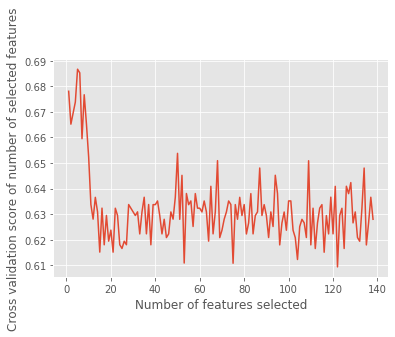

In [76]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Model Building

## SMOTE

In [145]:
from imblearn.over_sampling import SMOTE
import xgboost
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

In [146]:
smote_train.shape

(922, 138)

In [224]:
smote_train=pd.DataFrame(smote_train)
smote_train.columns=train.columns
smote_target=pd.DataFrame(smote_target)
smote_target.columns=['Observed_Attendance']

### PCA

In [225]:
pca = PCA(n_components = 3)
pca_std = pca.fit(smote_train, smote_target).transform(smote_train)

pca_std = pd.DataFrame(pca_std,columns = ['ATT1','ATT2','ATT3'])
pca_std = pca_std.merge(smote_target, left_index = True, right_index = True,how = 'left')
pca_std['Observed_Attendance'] = pca_std['Observed_Attendance'].replace({1:'Present',0:'Absent'})

In [233]:
P_pca = pca_std[(pca_std['Observed_Attendance'] == 'Present')]
A_pca = pca_std[(pca_std['Observed_Attendance'] == 'Absent')]

In [239]:
def PCA_scatter_3(P_pca,A_pca):
    trace1 = go.Scatter3d(x = P_pca['ATT1'],y = P_pca['ATT3'],z = P_pca['ATT2'],
                      mode = "markers",name = "Present",
                      marker = dict(size = 4,color = '#2ca02c',line = dict(width = 1))
                     )
    trace2 = go.Scatter3d(x = A_pca['ATT1'],y = A_pca['ATT3'],z = A_pca['ATT2'],
                      name = 'Absent', mode = 'markers',
                      marker = dict(size = 4,color= '#d62728',line = dict(width = 1))
                     )



    layout = go.Layout(dict(title = 'PCA Scatter plot (3 comp = 72.7%)',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'COMP1',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'COMP3',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'COMP2',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )),height = 700))
                  

    plots = [trace1,trace2]
    fig  = go.Figure(data = plots,layout = layout)
    py.iplot(fig)
    return

In [240]:
PCA_scatter_3(P_pca,A_pca)

In [241]:
from sklearn.pipeline import Pipeline

In [247]:
pipe = Pipeline(steps=[('pca', pca), ('Bernoulli', clf)])

In [245]:
test_pca=pca.transform(test)
pipe.fit(smote_train, smote_target)
pipe_target_pred = clf.predict(test_pca)
print(accuracy_score(target_val, pipe_target_pred))
print(classification_report(target_val, pipe_target_pred))

0.75
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.86      0.86      0.86         7

avg / total       0.75      0.75      0.75         8



### Algorithms Basic Analysis

In [148]:
MLA = [    
        # Generalized Linear Models
        LogisticRegressionCV(),
    
        # SVM
        svm.SVC(probability = True),
        svm.LinearSVC(),
    
        # KNN
        neighbors.KNeighborsClassifier(weights='distance'),
    
        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),
     
        # Naive Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),
    
        #Trees    
        tree.DecisionTreeClassifier(),
    
        # Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier()
     
    ]

cv_split = ShuffleSplit(n_splits = 10, test_size = .02, train_size = .98, random_state = 0)
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    cv_results = cross_validate(alg, smote_train, smote_target , cv  = None, return_train_score=True)
   
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
        
    row_index+=1
   

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)

In [149]:
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
7,GaussianNB,0.738146,0.703102,0.00199763
5,QuadraticDiscriminantAnalysis,0.745734,0.701978,0.061997
12,GradientBoostingClassifier,0.789091,0.685567,0.176313
9,AdaBoostClassifier,0.770115,0.680142,0.11332
11,ExtraTreesClassifier,0.868254,0.674766,0.0229988
8,DecisionTreeClassifier,0.868254,0.674723,0.00566244
1,SVC,0.734311,0.6727,0.277012
3,KNeighborsClassifier,0.86337,0.66939,0.00333182
13,RandomForestClassifier,0.860122,0.665019,0.0243321
10,BaggingClassifier,0.859579,0.661729,0.0466499


### random Forest

In [150]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [151]:
from sklearn.metrics import ( log_loss, classification_report)
rf = RandomForestClassifier(**rf_params)

In [152]:
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [153]:
rf_predictions = rf.predict(test)
print("Predictions finished")

Predictions finished


In [154]:
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.75
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.86      0.86      0.86         7

avg / total       0.75      0.75      0.75         8



### Gradient Boosting 

In [155]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 3,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [156]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)
print("Predictions have finished")

Predictions have finished


In [157]:
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



### BernoulliNB

In [209]:
clf = BernoulliNB()
clf.fit(smote_train, smote_target)
target_pred = clf.predict(test)

In [211]:
print(accuracy_score(target_val, target_pred))
print(classification_report(target_val, target_pred))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



### GaussianProcess

In [160]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(smote_train, smote_target)
target_pred = gpc.predict(test)
print(accuracy_score(target_val, target_pred))
print(classification_report(target_val,target_pred))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



### QuadraticDiscriminantAnalysis

In [212]:
quad=discriminant_analysis.QuadraticDiscriminantAnalysis().fit(smote_train, smote_target)
target_pred = quad.predict(test)
print(accuracy_score(target_val, target_pred))
print(classification_report(target_val,target_pred))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



### Voting Classification

In [162]:
#Voting Classifier
voting_clf = VotingClassifier (
        estimators = [('Gaussian', gpc), ('Bernoulli', clf)],
                     voting='soft', weights = [1, 1])
    
voting_clf.fit(data_cat, target)


VotingClassifier(estimators=[('Gaussian', GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=1, n_restarts_optimizer=0,
             optimizer='fmin_l_bfgs_b', random_state=0, warm_start=False)), ('Bernoulli', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=[1, 1])

In [163]:
target_pred = voting_clf.predict(test)
print(accuracy_score(target_val, target_pred))
print(classification_report(target_val,target_pred))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



## Without SMOTE(Unbalanced Dataset)

In [164]:
MLA = [    
        # Generalized Linear Models
        LogisticRegressionCV(),
    
        # SVM
        svm.SVC(probability = True),
        svm.LinearSVC(),
    
        # KNN
        neighbors.KNeighborsClassifier(weights='distance'),
    
        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),
     
        # Naive Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),
    
        #Trees    
        tree.DecisionTreeClassifier(),
    
        # Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier()
     
    ]

cv_split = ShuffleSplit(n_splits = 10, test_size = .01, train_size = .99, random_state = 0)
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    cv_results = cross_validate(alg, data_cat, target , cv  = cv_split, return_train_score=True)
   
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
        
    row_index+=1
   

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)

In [165]:
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
6,BernoulliNB,0.700283,0.7,0.00290101
8,DecisionTreeClassifier,0.842351,0.7,0.00719476
1,SVC,0.696176,0.6875,0.394698
4,LinearDiscriminantAnalysis,0.741926,0.6875,0.0496908
0,LogisticRegressionCV,0.711898,0.675,0.815
2,LinearSVC,0.742351,0.675,0.0376951
3,KNeighborsClassifier,0.832011,0.675,0.00429575
9,AdaBoostClassifier,0.735694,0.675,0.114596
11,ExtraTreesClassifier,0.842351,0.675,0.0256037
12,GradientBoostingClassifier,0.758499,0.6625,0.188695


# Tuning the Model with Hyper-Parameters

## Grid Search for SVM

In [166]:
# grid search for svm
classifier = svm.SVC()
base_results = cross_validate(classifier, data_cat, target, cv  = cv_split, return_train_score=True)
classifier.fit(data_cat, target)

epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', classifier.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

param_grid = {'C':[0.5,1.0,2.0, 3.0],  # penalty parameter C of the error term
              'kernel':['linear', 'rbf'], # specifies the kernel type to be used in the algorithm  
              'gamma':[0.02, 0.08,0.2,1.0] # kernel coefficient for 'rbf'
             }

# Grid Search
tune_model = GridSearchCV(svm.SVC(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(data_cat, target)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    

print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.6954674220963173 test_score: 0.75
epoch: 2 train_score: 0.6983002832861189 test_score: 0.5
epoch: 3 train_score: 0.6968838526912181 test_score: 0.625
epoch: 4 train_score: 0.6940509915014165 test_score: 0.875
epoch: 5 train_score: 0.6983002832861189 test_score: 0.5
epoch: 6 train_score: 0.6954674220963173 test_score: 0.75
epoch: 7 train_score: 0.6954674220963173 test_score: 0.75
epoch: 8 train_score: 0.6968838526912181 test_score: 0.625
epoch: 9 train_score: 0.6940509915014165 test_score: 0.875
epoch: 10 train_score: 0.6968838526912181 test_score: 0.625
----------
BEFORE Tuning Parameters:  {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
BEFORE Tuning Training w/bin score mean: 69.62
BEFORE Tuning Test w/bin score mean: 68.75
----------
epoch: 0 train_scor

In [167]:
classifier_svc= svm.SVC(kernel='rbf',C= 0.5, gamma =0.02,)
base_results = cross_validate(classifier_svc, data_cat, target, cv  = cv_split, return_train_score=True)
classifier_svc.fit(data_cat, target)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [168]:
classifier_svc_predictions = classifier_svc.predict(test)
print(accuracy_score(target_val, classifier_svc_predictions))
print(classification_report(target_val, classifier_svc_predictions))

0.75
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.86      0.86      0.86         7

avg / total       0.75      0.75      0.75         8



## Grid Search for Decision Trees

In [169]:
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results_dtree = cross_validate(dtree, data_cat, target, cv  = cv_split , return_train_score=True)
dtree.fit(data_cat, target)

epoch=0
for train_score,test_score in zip(base_results_dtree['train_score'], base_results_dtree['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', dtree.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results_dtree['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results_dtree['test_score'].mean()*100))
print('-'*10)

param_grid = {'criterion': ['gini','entropy'], 
              'splitter': ['best', 'random'], 
              'max_depth': [2,4,6,8,10,None], 
              #'min_samples_split': [2,5,7,10,12], 
              #'min_samples_leaf': [1,3,5,7, 10], 
              'random_state': [0] 
             }


tune_model = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(data_cat, target)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    

print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.8413597733711048 test_score: 0.875
epoch: 2 train_score: 0.8441926345609065 test_score: 0.625
epoch: 3 train_score: 0.8427762039660056 test_score: 0.5
epoch: 4 train_score: 0.8413597733711048 test_score: 0.75
epoch: 5 train_score: 0.8413597733711048 test_score: 0.875
epoch: 6 train_score: 0.8427762039660056 test_score: 0.5
epoch: 7 train_score: 0.8456090651558074 test_score: 0.5
epoch: 8 train_score: 0.8413597733711048 test_score: 0.75
epoch: 9 train_score: 0.8427762039660056 test_score: 0.75
epoch: 10 train_score: 0.839943342776204 test_score: 0.875
----------
BEFORE Tuning Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE Tuning Training w/bin score mean: 84.24
BEFORE Tuning Test w/bin score

In [170]:
# train the model using tuned decision tree parameters
dtree = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= None, random_state= 0, splitter= 'best')
base_results = cross_validate(dtree, data_cat, target, cv  = cv_split, return_train_score=True)
dtree.fit(data_cat, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [171]:
dtree_predictions = dtree.predict(test)
print(accuracy_score(target_val, dtree_predictions))
print(classification_report(target_val, dtree_predictions))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



In [172]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

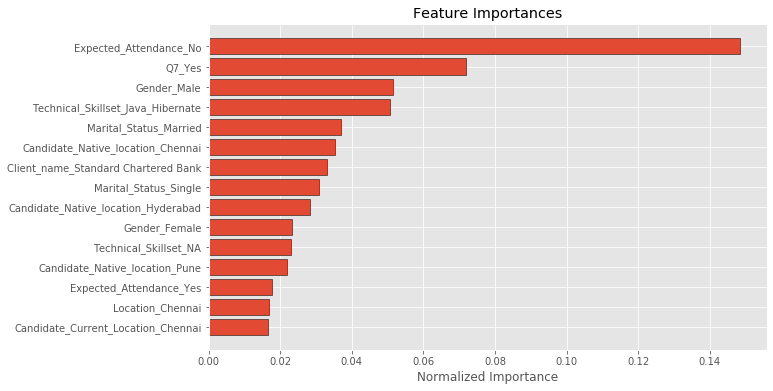

In [173]:
import matplotlib.pyplot as plt 
import seaborn as sns
importance = dtree.feature_importances_
feature = data_cat.columns
fi = pd.DataFrame()
fi['importance'] = importance
fi['feature'] = feature
fi_sorted = plot_feature_importances(fi)

## Grid Search for Bagging Classifier

In [177]:
classifier = ensemble.BaggingClassifier()
base_results = cross_validate(classifier, data_cat, target,cv  = cv_split, return_train_score=True)
classifier.fit(data_cat, target)

cl1 = LogisticRegressionCV()
cl2 = tree.DecisionTreeClassifier()
cl3 = discriminant_analysis.LinearDiscriminantAnalysis()
cl4 = neighbors.KNeighborsClassifier(weights='distance')
cl5 = svm.SVC()
param_grid = {'base_estimator':[cl1, cl2,cl3, cl4,cl5],
              'n_estimators':[10,13,17],
              #'warm_start':[False, True]
             }


tune_model = GridSearchCV(ensemble.BaggingClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(data_cat, target)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.01, train_size=0.99),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'base_estimator': [LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0...alse, random_state=None, shrinking=True,
  tol=0.001, verbose=False)], 'n_estimators': [10, 13, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [178]:
epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', classifier.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    


print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.8286118980169972 test_score: 0.875
epoch: 2 train_score: 0.830028328611898 test_score: 0.625
epoch: 3 train_score: 0.8371104815864022 test_score: 0.5
epoch: 4 train_score: 0.8257790368271954 test_score: 0.75
epoch: 5 train_score: 0.8385269121813032 test_score: 0.75
epoch: 6 train_score: 0.8328611898016998 test_score: 0.75
epoch: 7 train_score: 0.8427762039660056 test_score: 0.5
epoch: 8 train_score: 0.8328611898016998 test_score: 0.5
epoch: 9 train_score: 0.8356940509915014 test_score: 0.75
epoch: 10 train_score: 0.830028328611898 test_score: 0.625
----------
BEFORE Tuning Parameters:  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE Tuning Training w/bin score mean: 83.34
BEFORE Tuning Test w/bin score mean: 66.25
----------
epoch: 0 train_score: 0.7067988668555241 test_score: 0.875

In [179]:
Bagging_predictions = tune_model.predict(test)
print(accuracy_score(target_val, Bagging_predictions))
print(classification_report(target_val, Bagging_predictions))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



## Grid Search for Random Forest 

In [181]:
classifier = ensemble.RandomForestClassifier()
base_results = cross_validate(classifier, data_cat, target,cv  = cv_split, return_train_score=True)
classifier.fit(data_cat, target)

epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', classifier.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

param_grid = {'n_estimators': [15,25,30,35],
              'criterion': ['gini','entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'max_depth': [2,4,6,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,7,10,12], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,3,5], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [2,3,'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }


tune_model = GridSearchCV(ensemble.RandomForestClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(data_cat, target)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    


print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.8328611898016998 test_score: 0.875
epoch: 2 train_score: 0.8314447592067988 test_score: 0.625
epoch: 3 train_score: 0.8342776203966006 test_score: 0.5
epoch: 4 train_score: 0.8342776203966006 test_score: 0.625
epoch: 5 train_score: 0.8356940509915014 test_score: 0.625
epoch: 6 train_score: 0.8328611898016998 test_score: 0.5
epoch: 7 train_score: 0.8371104815864022 test_score: 0.5
epoch: 8 train_score: 0.8328611898016998 test_score: 0.5
epoch: 9 train_score: 0.830028328611898 test_score: 0.75
epoch: 10 train_score: 0.8314447592067988 test_score: 0.625
----------
BEFORE Tuning Parameters:  {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEF

In [182]:
# train the model using tuned random forest parameters
random_forest = ensemble.RandomForestClassifier(criterion= 'gini', max_depth= 2, random_state= 0,max_features= 2, min_samples_split= 12, n_estimators=25)
base_results = cross_validate(random_forest, data_cat, target, cv  = cv_split, return_train_score=True)
random_forest.fit(data_cat, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [183]:
random_forest_predictions = random_forest.predict(test)
print(accuracy_score(target_val, random_forest_predictions))
print(classification_report(target_val, random_forest_predictions))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



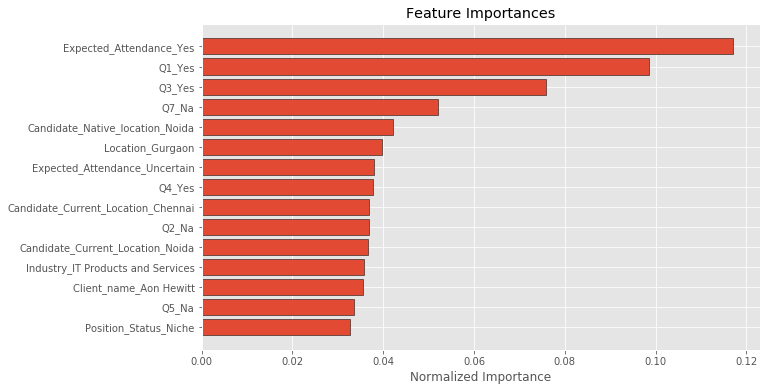

In [185]:
importance = random_forest.feature_importances_
feature = data_cat.columns
fi = pd.DataFrame()
fi['importance'] = importance
fi['feature'] = feature
fi_sorted = plot_feature_importances(fi)

In [263]:
# Scatter plot 
trace = go.Scatter(
    y = random_forest.feature_importances_,
    x = data_cat.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = data_cat.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

## Grid Search for Adaboost

In [186]:
classifier = ensemble.AdaBoostClassifier()
base_results = cross_validate(classifier, data_cat, target, cv  = cv_split, return_train_score=True)
classifier.fit(data_cat, target)

epoch=0
for train_score,test_score in zip(base_results['train_score'], base_results['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', classifier.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print('-'*10)

cl1 = LogisticRegressionCV()
cl2 = tree.DecisionTreeClassifier()
cl3 = naive_bayes.GaussianNB()
param_grid = {'base_estimator':[cl1, cl2, cl3]
             }


tune_model = GridSearchCV(ensemble.AdaBoostClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(data_cat, target)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    


print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 0.7351274787535411 test_score: 0.875
epoch: 2 train_score: 0.7379603399433428 test_score: 0.375
epoch: 3 train_score: 0.7308781869688386 test_score: 0.625
epoch: 4 train_score: 0.7337110481586402 test_score: 0.75
epoch: 5 train_score: 0.7379603399433428 test_score: 0.5
epoch: 6 train_score: 0.7337110481586402 test_score: 0.875
epoch: 7 train_score: 0.7351274787535411 test_score: 0.625
epoch: 8 train_score: 0.7365439093484419 test_score: 0.625
epoch: 9 train_score: 0.7351274787535411 test_score: 0.875
epoch: 10 train_score: 0.7407932011331445 test_score: 0.625
----------
BEFORE Tuning Parameters:  {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
BEFORE Tuning Training w/bin score mean: 73.57
BEFORE Tuning Test w/bin score mean: 67.50
----------
epoch: 0 train_score: 0.7082152974504249 test_score: 0.875
epoch: 1 train_score: 0.7450424929178471 test_score: 0.375
epoch: 2 train_score: 0.7393767705382436 t

In [187]:
AdaBoostClass_predictions = tune_model.predict(test)
print(accuracy_score(target_val, AdaBoostClass_predictions))
print(classification_report(target_val, AdaBoostClass_predictions))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



## BernoulI NB

In [207]:
clf = BernoulliNB()
clf.fit(train, target_train)
target_pred = clf.predict(test)

In [208]:
print(accuracy_score(target_val, target_pred))
print(classification_report(target_val, target_pred))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



# Selection Of Model without SMOTE

## Tune the Decision Tree Model with Feature Selection

In [191]:
print('BEFORE RFE Training Shape Old: ', data_cat.shape) 
print('BEFORE RFE Training Columns Old: ', data_cat.columns.values)

print("BEFORE RFE Training w/bin score mean: {:.2f}". format(base_results_dtree['train_score'].mean()*100)) 
print("BEFORE RFE Test w/bin score mean: {:.2f}". format(base_results_dtree['test_score'].mean()*100))
print('-'*10)

#feature selection
dtree_rfe = feature_selection.RFECV(tree.DecisionTreeClassifier(), step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data_cat, target)

#transform x&y to reduced features and fit new model
X_rfe = data_cat.columns.values[dtree_rfe.get_support()]
rfe_results = cross_validate(dtree, data_cat[X_rfe], target, cv  = cv_split)

print('AFTER RFE Training Shape New: ', data_cat[X_rfe].shape) 
print('AFTER RFE Training Columns New: ', X_rfe)

print("AFTER RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print('-'*10)

param_grid = {'criterion': ['gini','entropy'], 
              'splitter': ['best', 'random'], 
              'max_depth': [2,4,6,8,10,None], 
              #'min_samples_split': [2,5,7,10,12], 
              #'min_samples_leaf': [1,3,5,7, 10], 
              'random_state': [0] 
             }

#tune rfe model
rfe_tune_model = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split)
rfe_tune_model.fit(data_cat[X_rfe], target)

print('AFTER RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print("AFTER RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

BEFORE RFE Training Shape Old:  (714, 138)
BEFORE RFE Training Columns Old:  ['Client_name_ANZ' 'Client_name_Aon Hewitt' 'Client_name_Astrazeneca'
 'Client_name_Hospira' 'Client_name_Pfizer'
 'Client_name_Standard Chartered Bank' 'Industry_BFSI'
 'Industry_IT Products and Services' 'Industry_Pharmaceuticals'
 'Location_Bangalore' 'Location_CHENNAI' 'Location_Chennai'
 'Location_Delhi' 'Location_Gurgaon' 'Location_Gurgaonr'
 'Location_Hyderabad' 'Location_Noida' 'Location_chennai'
 'Position_Status_Niche' 'Position_Status_Routine'
 'Technical_Skillset_ALS Testing' 'Technical_Skillset_AML/KYC/CDD'
 'Technical_Skillset_Accounting Operations'
 'Technical_Skillset_Automation Testing Java'
 'Technical_Skillset_Banking Operations'
 'Technical_Skillset_Banking operations' 'Technical_Skillset_Biosimilars'
 'Technical_Skillset_Biosimiliars' 'Technical_Skillset_Biosimillar'
 'Technical_Skillset_CDD KYC' 'Technical_Skillset_EMEA'
 'Technical_Skillset_Global Labelling' 'Technical_Skillset_Hadoop'
 

In [204]:
# train the model using tuned decision tree parameters
dtunetree = tree.DecisionTreeClassifier(criterion= 'gini', max_depth=3, random_state= 0, splitter= 'best')
base_results = cross_validate(dtree, data_cat, target, cv  = cv_split, return_train_score=True)
dtunetree.fit(data_cat, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [205]:
dtunetree_predictions = dtunetree.predict(test)
print(accuracy_score(target_val, dtunetree_predictions))
print(classification_report(target_val, dtunetree_predictions))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



## Tune the Logistic Regression

In [206]:
# Find the best parameters (recall)
log2_clf = LogisticRegression(random_state = 42)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            }

CV_log2_clf = GridSearchCV(estimator = log2_clf, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log2_clf.fit(data_cat, target)

best_parameters = CV_log2_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    8.1s finished


The best parameters for using this model is {'C': 0.001, 'penalty': 'l2'}


In [201]:
# Log w best hyperparameters
CV_log2_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = 42)

CV_log2_clf.fit(data_cat, target)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [202]:
CV_log2_clf_predictions = CV_log2_clf.predict(test)
print(accuracy_score(target_val, CV_log2_clf_predictions))
print(classification_report(target_val, CV_log2_clf_predictions))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.88      1.00      0.93         7

avg / total       0.77      0.88      0.82         8



## Voting Classifier

In [203]:
#Voting Classifier
voting_clf = VotingClassifier (
        estimators = [('log1', dtunetree), ('log_2', CV_log2_clf)],
                     voting='soft', weights = [1, 1])
    
voting_clf.fit(data_cat, target)


VotingClassifier(estimators=[('log1', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=...alty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=[1, 1])

**Conclusion**


From the above without SMOTE Analysis it can be infered that the ensemble methods are not a good fit for our dataset. Although they are among the highest performers in terms of mean test accuracy, but they are facing the overfitting problem.

Ensemble methods mainly works in two ways:

either they sample the data multiple times and make many datasets (like bootstrapping), and on each dataset a classifier is being trained and then the combined result of each classifier is presented as output
or on each dataset produced, a classifier is being trained with a randomly chosen subset of the features set, and then the combined result of each classifier is presented as output.
In our case the dataset as well as the feature set, both are very small. So, while building the ensemble model, there is high probability that the different datasets produced have almost the same type of samples or since there are very few features, the different classifiers are considering the same features again and again. Due to these two reasons, the different classifiers in an ensemble model maybe having high correlations with each other. Hence, they can create the problem of **overfitting**, when the results of all these classifiers are combined.

Now, since decision tree algorithm is among the top performers, we can further try to improve the performance of this algorithm with sklearn's feature selection method by exploiting the feature_importance attribute of **decision trees** or we can use **Logistics Regression**

# Deep Learning

In [203]:
# Store the numerical features to a dataframe attrition_num
data_num = data[['Observed_Attendance']]
# Concat the two dataframes together columnwise
data_final = pd.concat([data_num, data_cat], axis=1)
data_final.head()

,Observed_Attendance,Client_name_ANZ,Client_name_Aon Hewitt,Client_name_Astrazeneca,Client_name_Hospira,Client_name_Pfizer,Client_name_Standard Chartered Bank,Industry_BFSI,Industry_IT Products and Services,Industry_Pharmaceuticals,...,Q7_Not Sure,Q7_Not yet,Q7_Yes,Q7_Yet to Check,Expected_Attendance_NA,Expected_Attendance_No,Expected_Attendance_Uncertain,Expected_Attendance_Yes,Marital_Status_Married,Marital_Status_Single
0,Yes,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1,No,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,No,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
3,Yes,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
4,Yes,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [207]:
train,test = train_test_split(data_final, test_size=0.02, random_state=42)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (699, 139)
Testing Data : (15, 139)


In [208]:
train_x = train.iloc[:,1:]
test_x = test.iloc[:,1:]

In [209]:
train_y = train.iloc[:,:1]
test_y = test.iloc[:,:1]

In [204]:
# Define a dictionary for the target mapping
Marker=[ 'Yes']
# Use the pandas apply method to numerically encode our attrition target variable
data_final['Observed_Attendance'] = data_final['Observed_Attendance'].apply(lambda x: 1 if x in Marker else 0)
#data_final.head(3)


## Single Layer Perceptron(ANN) + PCA

In [218]:
def ann_slp_pca():
    sklearn_pca = sklearnPCA(n_components=15)

    print("===========Data Summary===========")
    pca_train_x = sklearn_pca.fit_transform(train_x)
    print("PCA Training Data :", pca_train_x.shape)

    pca_test_x = sklearn_pca.fit_transform(test_x)
    print("PCA Testing Data :", pca_test_x.shape)

    X = tf.placeholder(tf.float32, [None,15])
    Y = tf.placeholder(tf.float32, [None, 1])

    W = tf.Variable(tf.random_normal([15,1], seed=0), name='weight')
    b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

    logits = tf.matmul(X,W) + b
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: pca_train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: pca_train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: pca_train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: pca_test_x, Y: test_y})
        
        print("\n============Results============")
        print("PCA Model Prediction =", train_acc)
        print("PCA Test Prediction =", test_acc)
        
        return train_acc, test_acc
    
ann_slp_pca_train_acc, ann_slp_pca_test_acc = ann_slp_pca()

===========Data Summary===========
PCA Training Data : (699, 15)
PCA Testing Data : (15, 15)

============Processing============
Step:     0	Loss: 1.170	Acc: 53.79%
Step:  1000	Loss: 0.551	Acc: 71.10%
Step:  2000	Loss: 0.551	Acc: 71.24%
Step:  3000	Loss: 0.551	Acc: 71.24%
Step:  4000	Loss: 0.551	Acc: 71.24%
Step:  5000	Loss: 0.551	Acc: 71.24%
Step:  6000	Loss: 0.551	Acc: 71.24%
Step:  7000	Loss: 0.551	Acc: 71.24%
Step:  8000	Loss: 0.551	Acc: 71.24%
Step:  9000	Loss: 0.551	Acc: 71.24%
Step: 10000	Loss: 0.551	Acc: 71.24%

============Results============
PCA Model Prediction = 0.71244633
PCA Test Prediction = 0.4


## Multi Layer Perceptron +PCA

In [220]:
def ann_mlp_pca():
    sklearn_pca = sklearnPCA(n_components=10)

    print("===========Data Summary===========")
    pca_train_x = sklearn_pca.fit_transform(train_x)
    print("PCA Training Data :", pca_train_x.shape)

    pca_test_x = sklearn_pca.fit_transform(test_x)
    print("PCA Testing Data :", pca_test_x.shape)

    X = tf.placeholder(tf.float32, [None,10])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([10,64], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([64], seed=0), name='bias1')
    layer1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([64,128], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([128], seed=0), name='bias2')
    layer2 = tf.nn.sigmoid(tf.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([128,128], seed=0), name='weight3')
    b3 = tf.Variable(tf.random_normal([128], seed=0), name='bias3')
    layer3 = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([128,1], seed=0), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: pca_train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: pca_train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: pca_train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: pca_test_x, Y: test_y})
        
        print("\n============Results============")
        print("PCA Model Prediction =", train_acc)
        print("PCA Test Prediction =", test_acc)
        
        return train_acc,test_acc
        
ann_mlp_pca_train_acc, ann_mlp_pca_test_acc = ann_mlp_pca()

===========Data Summary===========
PCA Training Data : (699, 10)
PCA Testing Data : (15, 10)

============Processing============
Step:     0	Loss: 2.443	Acc: 65.67%
Step:  1000	Loss: 0.583	Acc: 69.10%
Step:  2000	Loss: 0.542	Acc: 71.10%
Step:  3000	Loss: 0.521	Acc: 72.68%
Step:  4000	Loss: 0.508	Acc: 73.82%
Step:  5000	Loss: 0.498	Acc: 74.25%
Step:  6000	Loss: 0.490	Acc: 74.96%
Step:  7000	Loss: 0.484	Acc: 74.96%
Step:  8000	Loss: 0.478	Acc: 76.11%
Step:  9000	Loss: 0.473	Acc: 76.54%
Step: 10000	Loss: 0.468	Acc: 76.68%

============Results============
PCA Model Prediction = 0.7668097
PCA Test Prediction = 0.46666667


**The above Deep learning Model not learning too much due to lack of training Data so we can't use that**

**Conclusion on Feature Importance who Not Attending**

From RandomForest & DecisionTree & RFE:
what it draws that the following contributing attributes  **Candidate Naive Location Chennai, Gender Male,Client_Name_Standard Chartered, Technical skillset Java,Martial status single, Question3+yes,Question7+yes**

[Q3=Can I Call you three hours before the interview and follow up on your attendance for the interview?]
[Q7=Has the call letter been shared?]

So the **Bernoulli NB, Gaussian Classifier ,Voting Classifier** with Balanced Dataset is a good predictor for this model. Because its showing less variance and bias. Similarly **Decision Tree , Bernoulii NB** with unbalanced is a good algorithm 

There's either a limit of how well attrition can be predicted with the known features, or feature selection can be improved in order to achieve better results. A future study could be done to focus on feature selection alone, re-running the algorithms built here. The simplest model **(Naive Bayes)** is probably the most useful one. So, what model to use? I would personally go with Naive Bayes (with all features): even though the overall accuracy is a bit underwhelming (85%), the attrition prediction is too valuable to pass. It's better raise false alarms (depending on how that is conducted) than to miss the change to identify attendence before it occur

**Resources:**
https://plot.ly/python/
https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0
https://www.tensorflow.org/tutorials/customization/basics
https://machinelearningmastery.com/machine-learning-with-python/
https://github.com/changwookjun/StudyBook/
https://github.com/aniruddhachoudhury
https://github.com/TarrySingh/Artificial-Intelligence-Deep-Learning-Machine-Learning-Tutorials
